In [3]:
#Imports
import pandas as pd
import functions as func
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

db_locations = func.import_yaml()

#load df
df_1 = pd.read_csv(db_locations['data_raw']['file1'])
df_2 = pd.read_csv(db_locations['data_raw']['file2'])
df_3 = pd.read_csv(db_locations['data_raw']['file3'])
df_4 = pd.read_csv(db_locations['data_raw']['file4'])


In [27]:
# Merge df_1 with df_2
df_user_comp = df_1.merge(df_2, on= "client_id").reindex(df_1.index)
df_user_comp.head(10)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
5,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0,Control
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0,Control
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0,Test
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0,Control
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0,Test


In [13]:
df_user_comp.shape

(70609, 10)

In [14]:
df_user_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
 9   Variation         50500 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 5.4+ MB


In [28]:
#Checking null

df_user_comp.isnull().any()

client_id           False
clnt_tenure_yr       True
clnt_tenure_mnth     True
clnt_age             True
gendr                True
num_accts            True
bal                  True
calls_6_mnth         True
logons_6_mnth        True
Variation            True
dtype: bool

In [29]:
# droping rows with nan on the variation Column, clients that didnt use the app for the amount of time tested
# check the missing values

df_user_comp.dropna(subset= "Variation",inplace=True)
df_user_comp.isnull().sum().sort_values(ascending=False)

clnt_age            13
clnt_tenure_yr      12
clnt_tenure_mnth    12
gendr               12
num_accts           12
bal                 12
calls_6_mnth        12
logons_6_mnth       12
client_id            0
Variation            0
dtype: int64

In [65]:
df_user_comp.sort_values(by=['bal']).tail(20)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
21184,987970,14.0,179.0,74.5,M,3.0,7339443.17,4.0,9.0,Control
14057,3519657,18.0,218.0,66.5,M,6.0,7741994.01,6.0,9.0,Control
31811,6762377,16.0,193.0,41.5,F,3.0,8045102.60,6.0,9.0,Test
20871,1678193,24.0,299.0,65.5,M,3.0,8137343.24,6.0,9.0,Test
2171,2291985,7.0,85.0,41.0,M,2.0,8247729.97,1.0,4.0,Control
13318,9440656,7.0,94.0,63.0,F,2.0,8292996.21,6.0,9.0,Control
23849,7070097,11.0,133.0,53.0,M,2.0,8986419.77,6.0,9.0,Test
39367,9286288,21.0,254.0,62.5,M,3.0,16320040.15,6.0,9.0,Test
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control


In [76]:
#droping rows with columns with more that 8 columns with nan values, in this case it would corrupt the data
df_user_comp.dropna(thresh = 8, inplace= True)

In [77]:
df_user_comp.shape

(50488, 10)

In [18]:
#checking types of data 
df_user_comp.select_dtypes("number").nunique().sort_values(ascending=False)


client_id           50500
bal                 50312
clnt_tenure_mnth      469
clnt_age              158
clnt_tenure_yr         53
num_accts               7
calls_6_mnth            7
logons_6_mnth           7
dtype: int64

In [19]:
df_user_comp.select_dtypes("object").nunique().sort_values(ascending=False)

gendr        4
Variation    2
dtype: int64

In [ ]:
#EDA - UNIVARIATE

In [123]:
#Checking poll of variation
# there is a slight diference that shouldnt impact the results
frequency_table = df_user_comp['Variation'].value_counts()
proportion_table = df_user_comp['Variation'].value_counts(normalize=True)

frequency_table


Variation
Test       26960
Control    23527
Name: count, dtype: int64

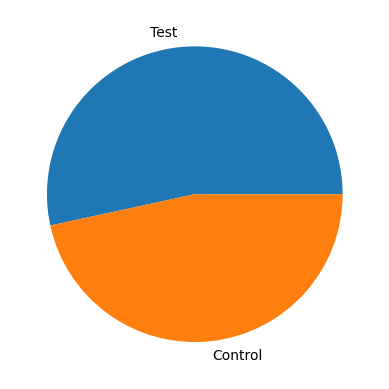

In [124]:
plt.pie(proportion_table.values, labels = proportion_table.index)
plt.show()

In [80]:

#checking frequency table for gender
# By the result could assume that the database probably is probably 50/50 on gender, with a small higher number of males
# The data is inconclusive, so we cant use it
frequency_table = df_user_comp['gendr'].value_counts()
proportion_table = df_user_comp['gendr'].value_counts(normalize=True)

frequency_table

gendr
U    17280
M    16947
F    16259
X        2
Name: count, dtype: int64

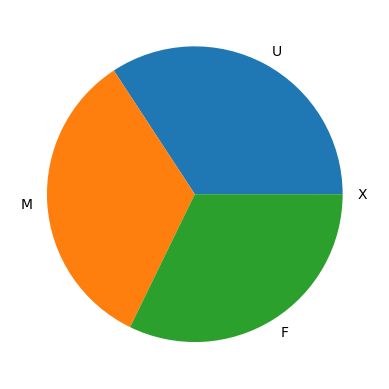

In [79]:
plt.pie(proportion_table.values, labels = proportion_table.index)
plt.show()

In [130]:
#checking numerical values

df_user_comp.select_dtypes("number").describe()


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,5.048700e+04,50487.000000,50487.000000,50486.000000,50487.000000,50487.000000,50487.000000,50487.000000
mean,5.006088e+06,12.031553,150.413433,47.319495,2.254561,149.195298,3.093232,6.131816
std,2.877382e+06,6.860234,81.944345,15.518622,0.533666,293.337480,2.187974,2.175407
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,24.000000,0.000000,3.000000
25%,2.515688e+06,6.000000,82.000000,33.500000,2.000000,40.000000,1.000000,4.000000
50%,5.025010e+06,11.000000,136.000000,48.000000,2.000000,66.000000,3.000000,6.000000
75%,7.477841e+06,16.000000,192.000000,59.500000,2.000000,140.000000,5.000000,8.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,8986.000000,6.000000,9.000000


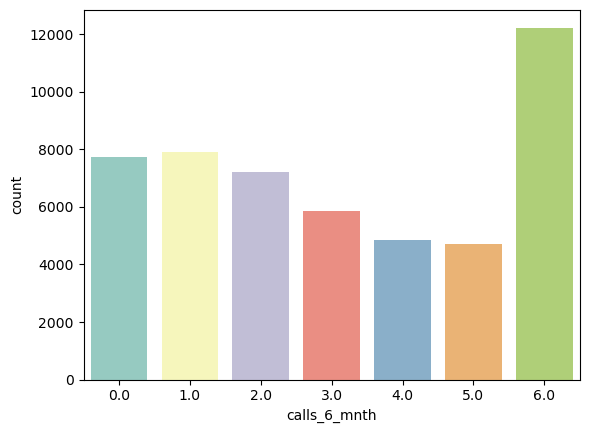

In [119]:
sns.countplot(data=df_user_comp, x='calls_6_mnth', palette="Set3", hue='calls_6_mnth', legend=False);

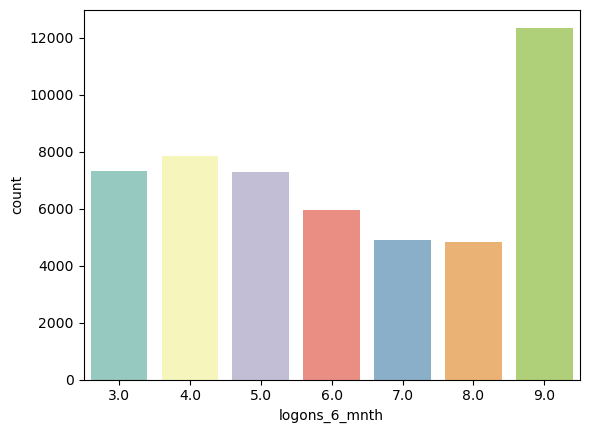

In [120]:
sns.countplot(data=df_user_comp, x='logons_6_mnth', palette="Set3", hue='logons_6_mnth', legend=False);

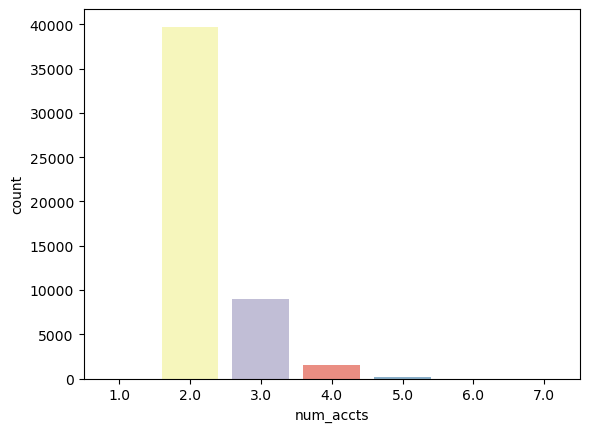

In [122]:
sns.countplot(data=df_user_comp, x='num_accts', palette="Set3", hue='num_accts', legend=False);

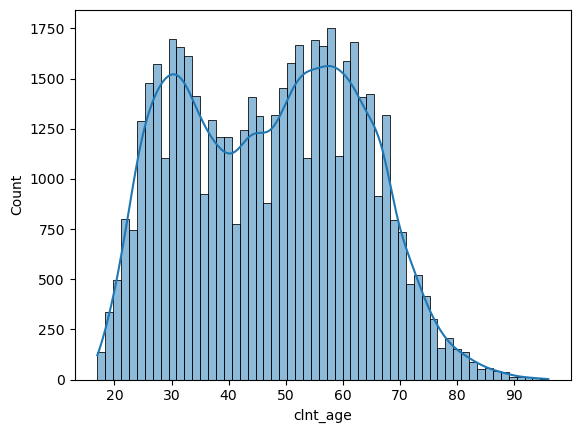

In [82]:
#Checking ages
sns.histplot(df_user_comp['clnt_age'], kde=True)


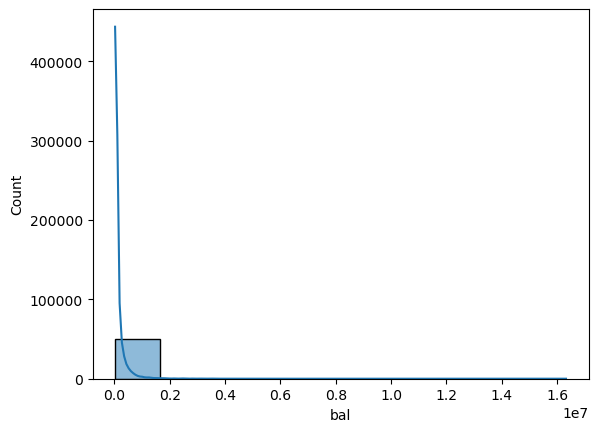

In [83]:
#Checking balance
sns.histplot(df_user_comp['bal'],bins= 10, kde=True)

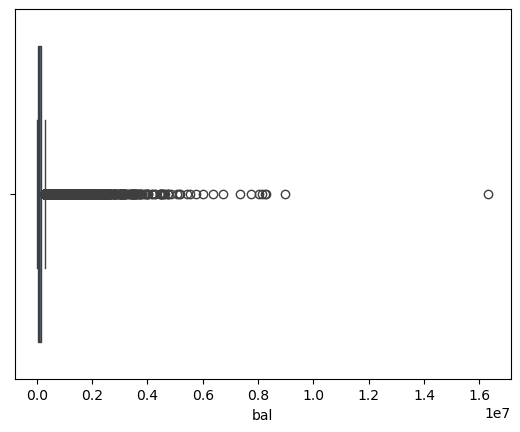

In [84]:
sns.boxplot(x = df_user_comp['bal'])

In [85]:
df_user_comp.sort_values(by=['bal']).tail(20)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
24711,6981798,9.0,108.0,44.5,M,3.0,4739012.27,4.0,7.0,Control
45398,8962152,11.0,141.0,57.5,M,2.0,4753214.10,6.0,9.0,Control
35108,9848978,6.0,78.0,38.5,U,3.0,4862430.04,6.0,9.0,Test
25162,8841326,32.0,391.0,60.5,F,2.0,5085307.11,6.0,9.0,Control
47090,5799151,21.0,254.0,56.0,M,3.0,5137641.69,6.0,9.0,Control
20844,6765532,28.0,336.0,56.0,M,3.0,5187970.13,5.0,8.0,Test
14425,8700059,11.0,132.0,65.0,M,2.0,5439354.90,3.0,6.0,Test
40615,2243576,11.0,136.0,62.0,M,2.0,5544842.49,6.0,9.0,Test
36379,3545814,13.0,163.0,59.0,M,3.0,5754204.68,6.0,9.0,Test
49388,5735570,37.0,451.0,73.0,M,3.0,6000386.82,6.0,9.0,Test


In [107]:
# there is a outlier that is changing the values in an huge manner. lets drop it and check the diference in data
df_user_comp.drop(df_user_comp.index[df_user_comp.client_id == 9286288], inplace= True)
df_user_comp.sort_values(by=['bal']).tail(20)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
47384,7991760,30.0,363.0,53.0,M,3.0,4730367.72,6.0,9.0,Control
24711,6981798,9.0,108.0,44.5,M,3.0,4739012.27,4.0,7.0,Control
45398,8962152,11.0,141.0,57.5,M,2.0,4753214.10,6.0,9.0,Control
35108,9848978,6.0,78.0,38.5,U,3.0,4862430.04,6.0,9.0,Test
25162,8841326,32.0,391.0,60.5,F,2.0,5085307.11,6.0,9.0,Control
47090,5799151,21.0,254.0,56.0,M,3.0,5137641.69,6.0,9.0,Control
20844,6765532,28.0,336.0,56.0,M,3.0,5187970.13,5.0,8.0,Test
14425,8700059,11.0,132.0,65.0,M,2.0,5439354.90,3.0,6.0,Test
40615,2243576,11.0,136.0,62.0,M,2.0,5544842.49,6.0,9.0,Test
36379,3545814,13.0,163.0,59.0,M,3.0,5754204.68,6.0,9.0,Test


In [108]:
df_user_comp.sort_values(by=['bal']).head(20)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
2467,5395227,7.0,93.0,32.5,U,2.0,23789.44,0.0,3.0,Test
3470,2963704,23.0,281.0,56.0,F,2.0,23789.49,0.0,3.0,Test
42269,8150905,13.0,167.0,53.0,M,2.0,23789.54,0.0,3.0,Test
49704,9962929,15.0,191.0,70.5,M,2.0,23789.61,2.0,5.0,Control
34793,3663863,15.0,189.0,52.5,M,2.0,23789.61,0.0,3.0,Control
48397,7201571,10.0,121.0,48.5,M,2.0,23789.72,4.0,7.0,Test
20785,1724386,14.0,173.0,72.0,F,2.0,23789.72,1.0,4.0,Test
34200,6389894,15.0,188.0,62.0,M,2.0,23789.86,0.0,4.0,Control
5205,2207701,9.0,109.0,61.5,M,2.0,23789.86,4.0,7.0,Control
11979,960482,13.0,161.0,31.5,F,2.0,23789.95,2.0,5.0,Test


In [105]:
df_user_comp.bal.describe()

count    5.048700e+04
mean     1.491944e+05
std      2.933400e+05
min      2.378944e+04
25%      3.987718e+04
50%      6.573287e+04
75%      1.399537e+05
max      8.986420e+06
Name: bal, dtype: float64

In [113]:
# change the values for k dolars so is easier to read an reduce the diference in numbers
df_user_comp.bal = df_user_comp.bal.apply(lambda x : round (x *0.001,0) )


In [116]:
df_user_comp.bal.describe()

count    50487.000000
mean       149.195298
std        293.337480
min         24.000000
25%         40.000000
50%         66.000000
75%        140.000000
max       8986.000000
Name: bal, dtype: float64

<Axes: xlabel='bal', ylabel='Count'>

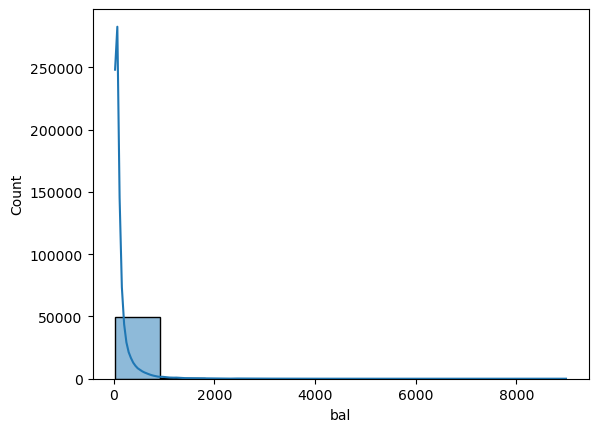

In [114]:
#checking graphs again for balance withou the outlier
sns.histplot(df_user_comp['bal'],bins= 10, kde=True)

<Axes: xlabel='bal'>

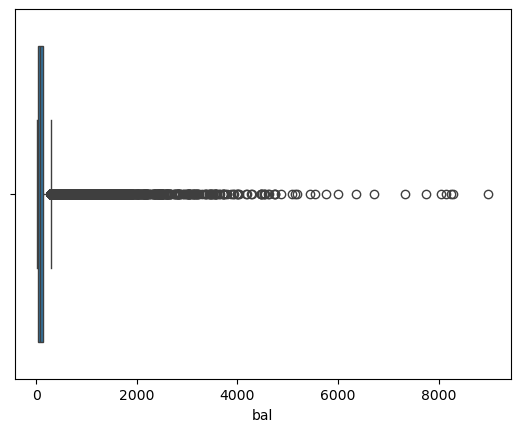

In [115]:
sns.boxplot(x = df_user_comp['bal'])

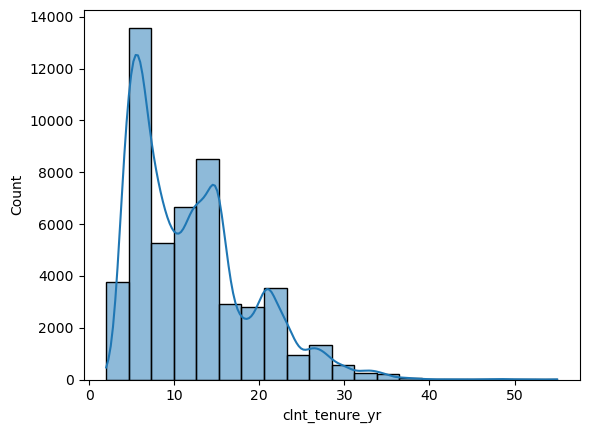

In [104]:
#Checking the time the client is a client 
sns.histplot(df_user_comp['clnt_tenure_yr'],bins= 20, kde=True)

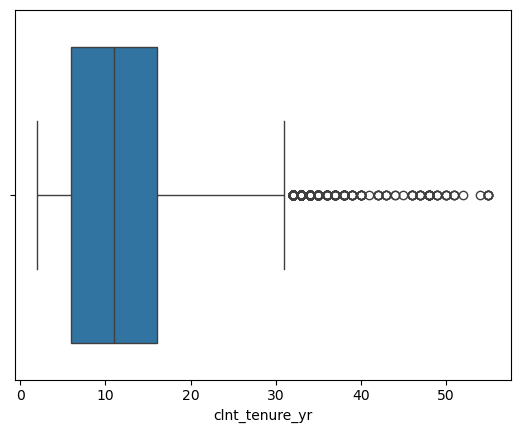

In [107]:
sns.boxplot(x = df_user_comp['clnt_tenure_yr'])

In [178]:
df_user_comp.sort_values(by=['clnt_tenure_mnth']).head(20)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
19624,2881524,2.0,33.0,33.5,U,2.0,27.0,1.0,4.0,Test
30784,6403610,2.0,33.0,34.0,U,2.0,147.0,4.0,7.0,Test
41350,7260973,2.0,33.0,56.5,M,2.0,38.0,1.0,4.0,Test
2009,4738135,2.0,33.0,57.0,U,2.0,772.0,6.0,9.0,Control
19406,9169459,2.0,33.0,60.5,U,2.0,27.0,2.0,5.0,Test
851,1954630,2.0,33.0,33.5,U,2.0,30.0,4.0,7.0,Test
44088,7520125,2.0,33.0,41.5,F,4.0,434.0,6.0,9.0,Test
48893,9572729,2.0,33.0,63.5,M,3.0,40.0,6.0,9.0,Test
49688,1585633,2.0,33.0,23.0,M,4.0,110.0,5.0,8.0,Test
24707,4929178,2.0,33.0,44.5,M,3.0,645.0,4.0,7.0,Test


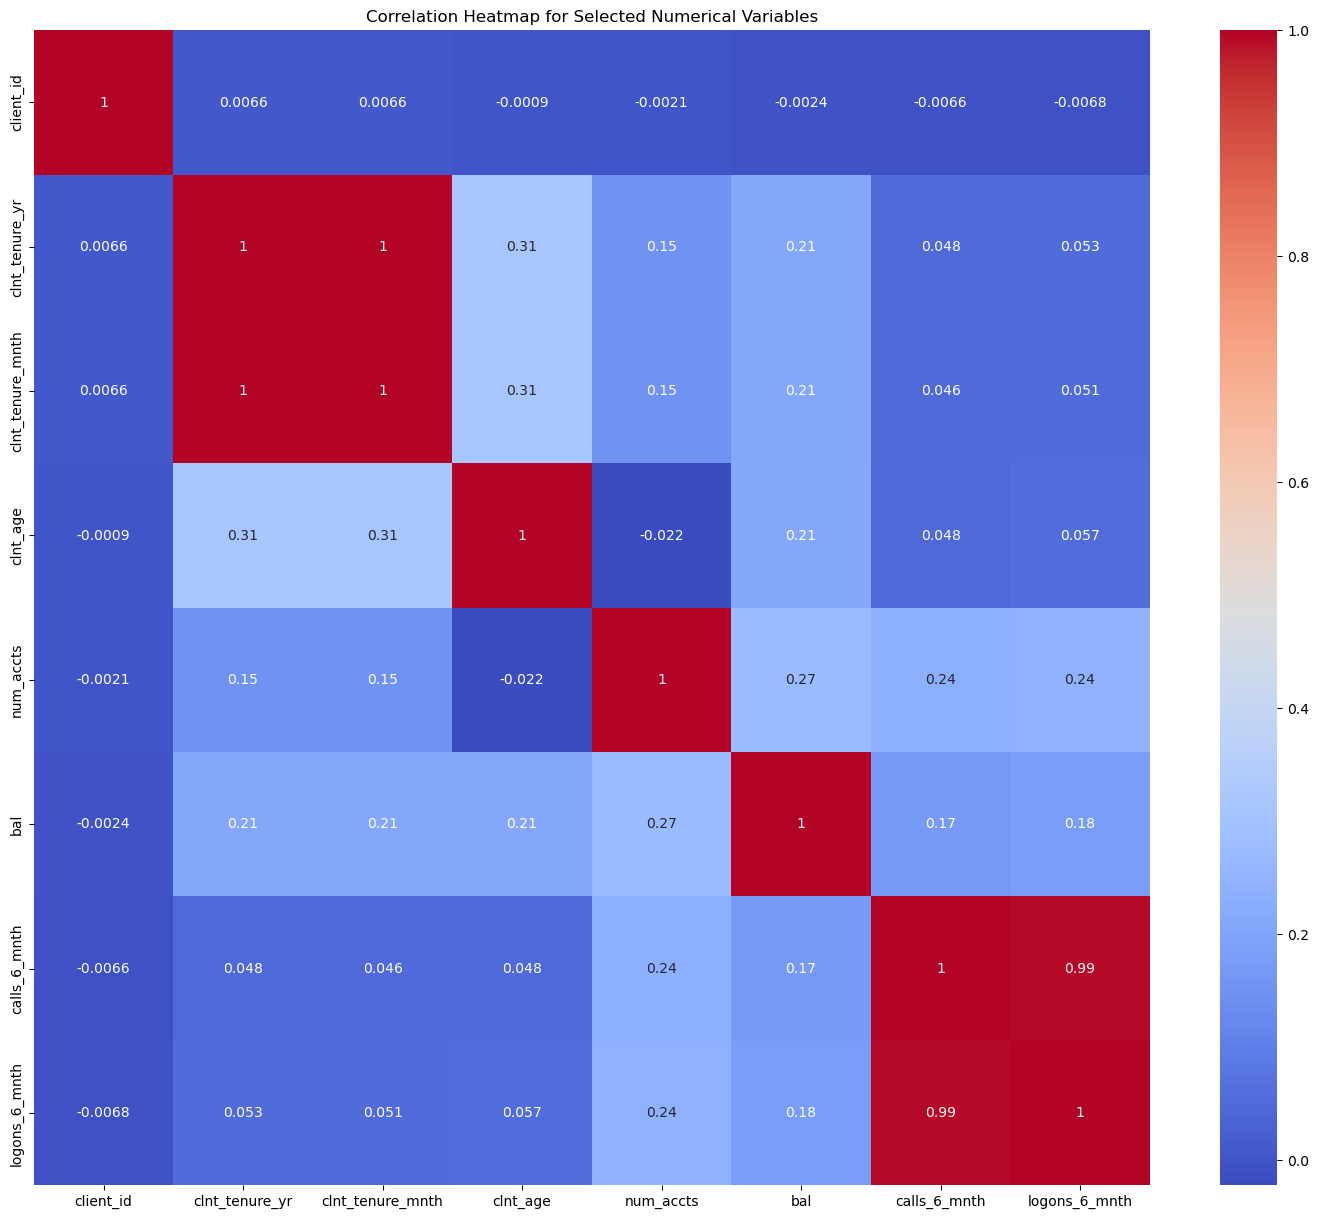

In [131]:
#EDA - Bivariate
# checking all numeric tables

correlation_matrix = df_user_comp.select_dtypes("number").corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()


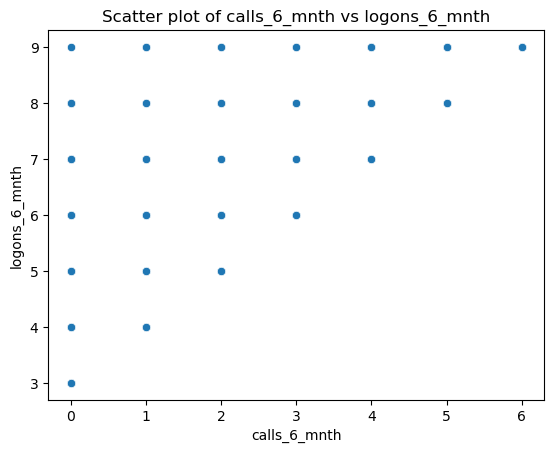

In [179]:
#checking class and logons
plt.title('Scatter plot of calls_6_mnth vs ' + col)
sns.scatterplot(data=df_user_comp, x="calls_6_mnth", y="logons_6_mnth")
plt.show()

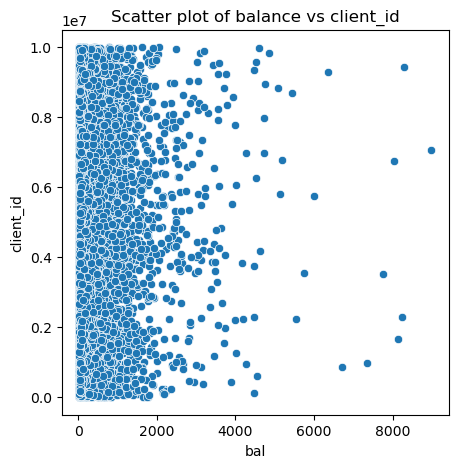

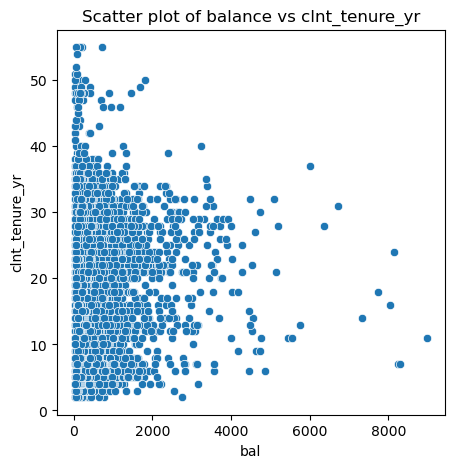

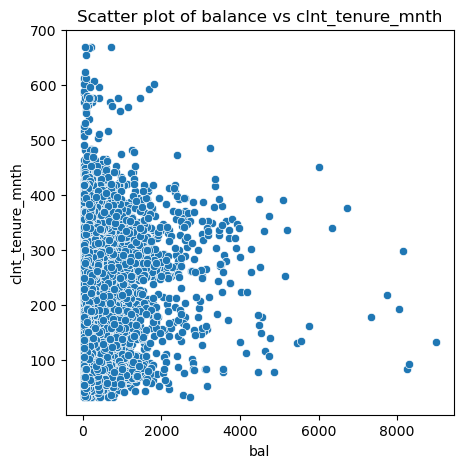

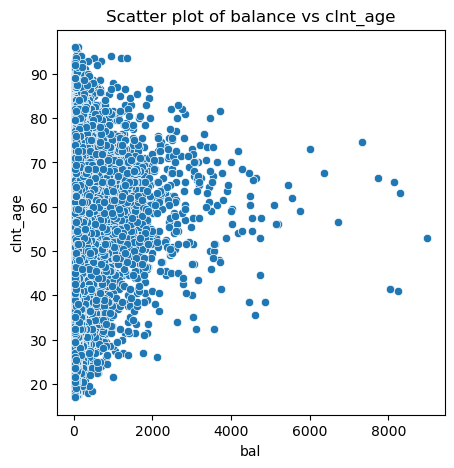

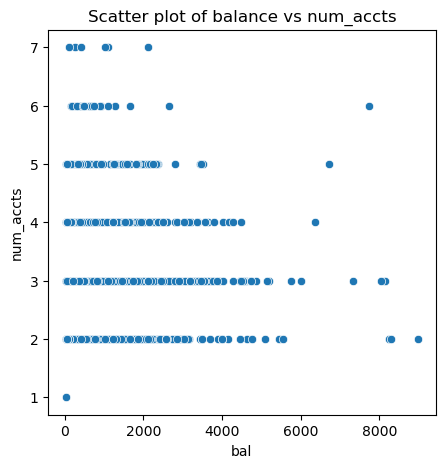

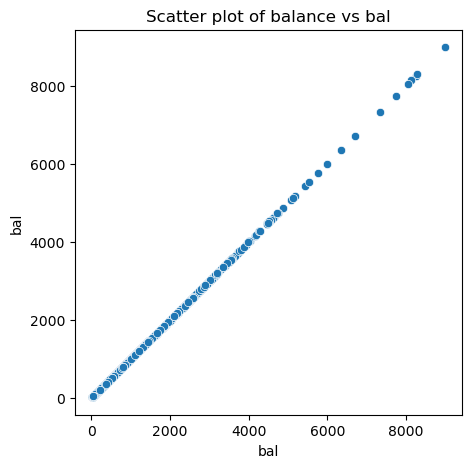

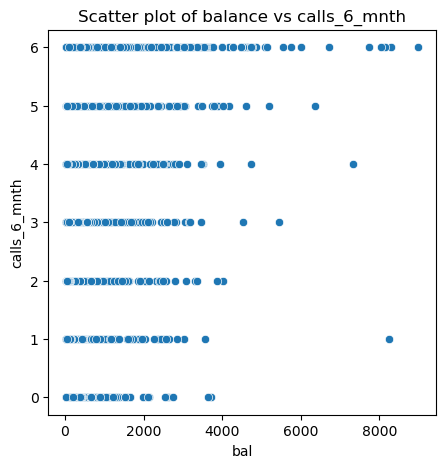

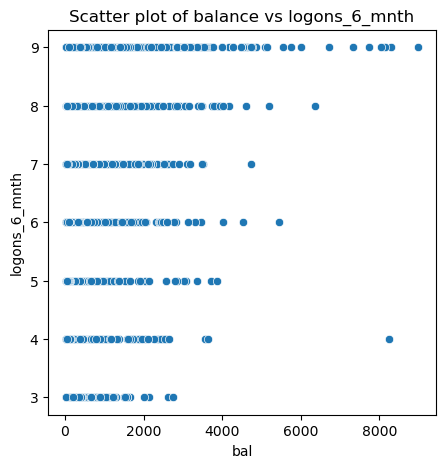

In [138]:
#checking with visual aid for balance
for col in df_user_comp.select_dtypes("number").columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of balance vs ' + col)
    sns.scatterplot(data=df_user_comp, x="bal", y=col)
    plt.show()

In [140]:
#checking if there is a relation to valitation and gender that might have an impact
crosstab_result = pd.crosstab(df_user_comp['gendr'], df_user_comp['Variation'])
crosstab_result

Variation,Control,Test
gendr,,
F,7543,8716
M,7970,8976
U,8014,9266
X,0,2


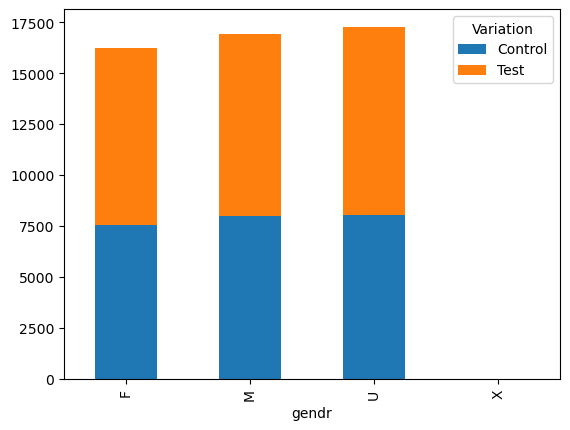

In [141]:
crosstab_result.plot(kind="bar", stacked=True);

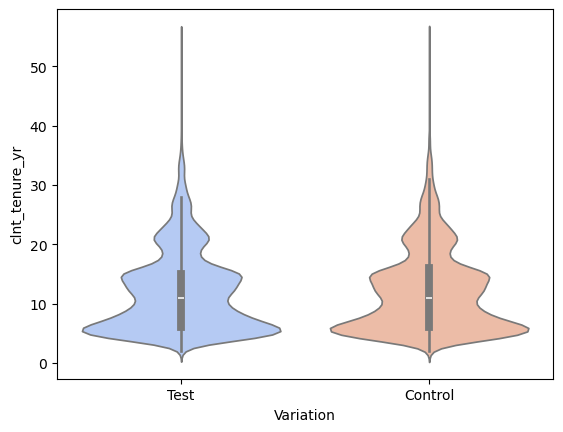

In [143]:
#cheking various relationships betwen tabels with visual aid

sns.violinplot(data=df_user_comp, x='Variation', y='clnt_tenure_yr', palette="coolwarm", hue='Variation', legend=False);

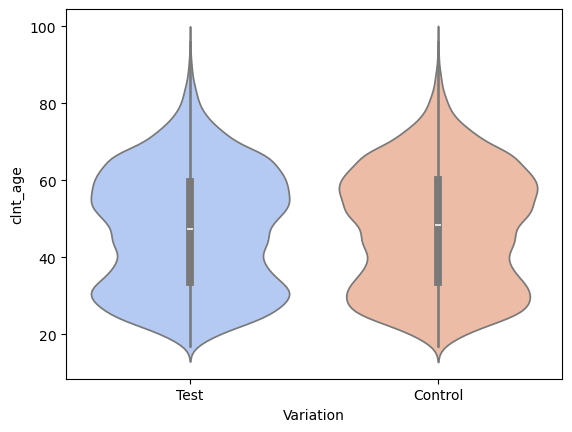

In [144]:
sns.violinplot(data=df_user_comp, x='Variation', y='clnt_age', palette="coolwarm", hue='Variation', legend=False);

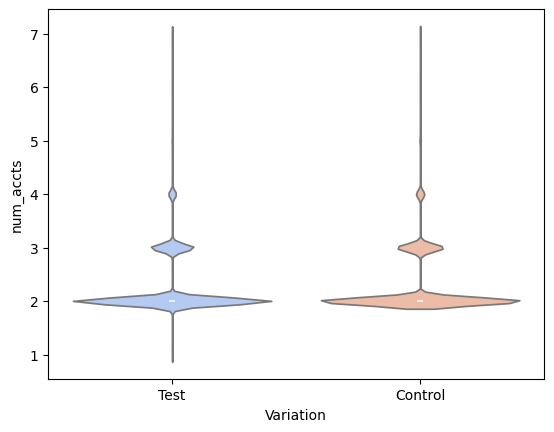

In [145]:
sns.violinplot(data=df_user_comp, x='Variation', y='num_accts', palette="coolwarm", hue='Variation', legend=False);

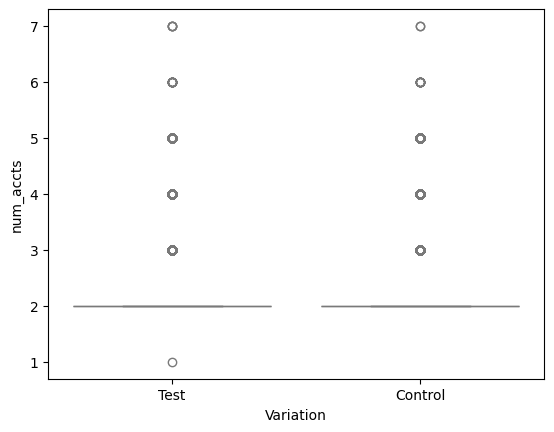

In [153]:
sns.boxplot(data=df_user_comp, x='Variation', y='num_accts', palette="coolwarm", hue='Variation', legend=False);

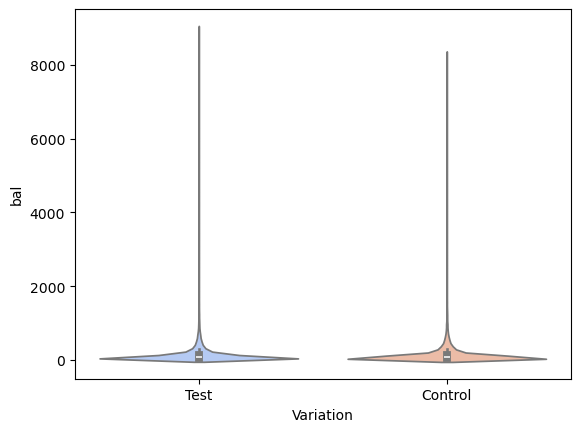

In [146]:
sns.violinplot(data=df_user_comp, x='Variation', y='bal', palette="coolwarm", hue='Variation', legend=False);

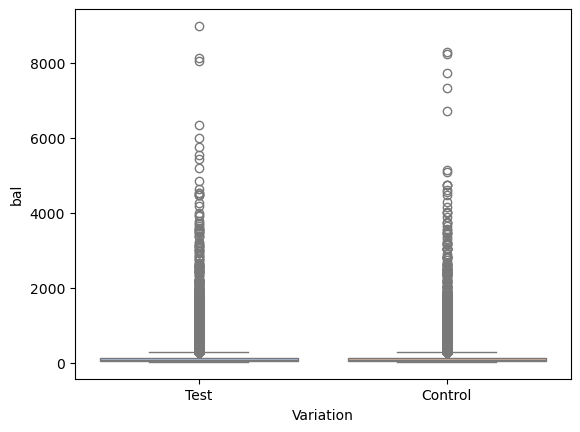

In [152]:
sns.boxplot(data=df_user_comp, x='Variation', y='bal', palette="coolwarm", hue='Variation', legend=False);

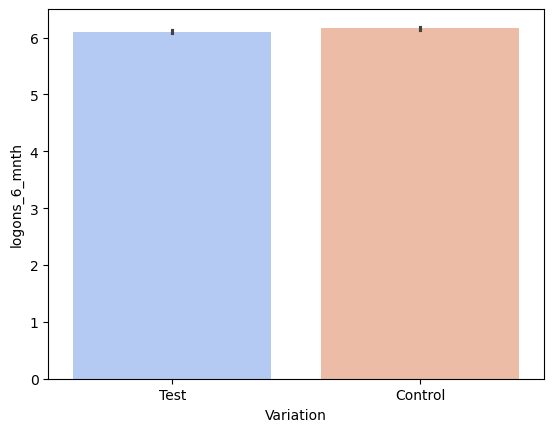

In [151]:
sns.barplot(data=df_user_comp, x='Variation', y='logons_6_mnth', palette="coolwarm", hue='Variation', legend=False);

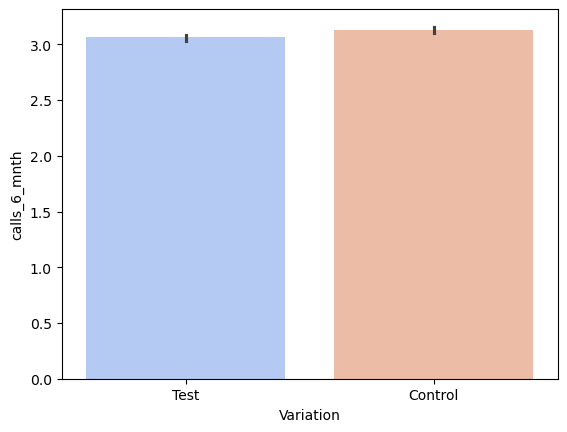

In [150]:
sns.barplot(data=df_user_comp, x='Variation', y='calls_6_mnth', palette="coolwarm", hue='Variation', legend=False);

In [30]:
# Merge df_3 with df_4

df_combined = pd.concat([df_3, df_4], ignore_index=True)
df_combined.head(20)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43


In [15]:
df_combined.isnull().any()

client_id       False
visitor_id      False
visit_id        False
process_step    False
date_time       False
dtype: bool

In [31]:
df_combined.shape

(755405, 5)

In [32]:
df_combined.client_id.value_counts().tail(50)

client_id
5430280    1
7508908    1
4165625    1
1125445    1
1455678    1
4822851    1
8833500    1
753497     1
5646224    1
9707723    1
6101609    1
1743864    1
6343415    1
6270847    1
4802709    1
8969101    1
4040765    1
3597029    1
7839492    1
2418205    1
8847795    1
4054923    1
9544510    1
7236154    1
2085264    1
9659405    1
7702166    1
8917477    1
8954204    1
4740171    1
3346321    1
9037822    1
4856038    1
5923022    1
4214485    1
8354242    1
2712440    1
19225      1
1804647    1
8364481    1
8071700    1
65768      1
5606519    1
922865     1
4430317    1
656715     1
2066750    1
1283050    1
6963245    1
674799     1
Name: count, dtype: int64

In [37]:
df_combined.client_id.value_counts().head(10)



client_id
5574879    111
2274658     90
2128341     84
5951379     81
1595223     81
1952790     80
9800867     75
7733877     72
465007      72
3545814     72
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Count'>

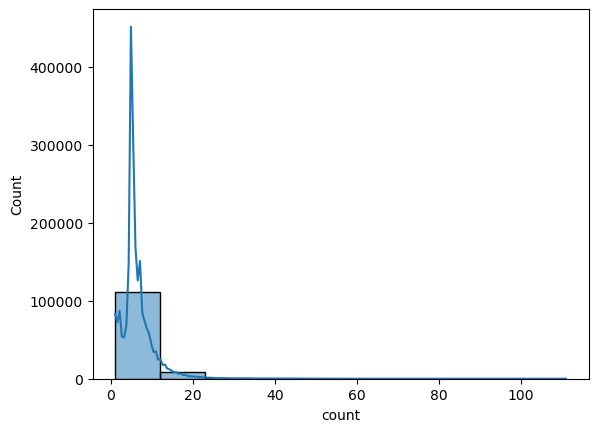

In [36]:
sns.histplot(df_combined.client_id.value_counts(),bins= 10, kde=True)

In [39]:
# Convert the ‘date_time’ column to datetime if it is not already
df_combined['date_time'] = pd.to_datetime(df_combined['date_time'])
# Sort the DataFrame by ‘visitor_id’ and ‘date_time’ to ensure the correct order of steps
df_combined = df_combined.sort_values(by=['visitor_id', 'date_time'])
# Create a new column with the previous time using the shift method
df_combined['prev_time'] = df_combined.groupby('visitor_id')['date_time'].shift(1)
# Calculate the time difference between the current and previous row
df_combined['time_diff'] = df_combined['date_time'] - df_combined['prev_time']
# Convert time_diff to seconds (or minutes, depending on your needs)
df_combined['time_diff_seconds'] = df_combined['time_diff'].dt.total_seconds()
# Check for negative time differences

In [21]:
df_combined[df_combined["client_id"]==5574879 ].head(30)

,client_id,visitor_id,visit_id,process_step,date_time,prev_time,time_diff,time_diff_seconds
744133,5574879,722943003_3441581446,875138661_34710212496_881092,step_1,2017-05-02 10:36:37,NaT,NaT,NaN
744134,5574879,722943003_3441581446,875138661_34710212496_881092,step_1,2017-05-02 10:36:37,2017-05-02 10:36:37,0 days 00:00:00,0.0
744135,5574879,722943003_3441581446,875138661_34710212496_881092,step_1,2017-05-02 10:36:37,2017-05-02 10:36:37,0 days 00:00:00,0.0
744136,5574879,722943003_3441581446,875138661_34710212496_881092,step_1,2017-05-02 10:36:37,2017-05-02 10:36:37,0 days 00:00:00,0.0
744137,5574879,722943003_3441581446,875138661_34710212496_881092,step_1,2017-05-02 10:36:37,2017-05-02 10:36:37,0 days 00:00:00,0.0
744138,5574879,722943003_3441581446,875138661_34710212496_881092,step_1,2017-05-02 10:36:37,2017-05-02 10:36:37,0 days 00:00:00,0.0
744139,5574879,722943003_3441581446,875138661_34710212496_881092,step_1,2017-05-02 10:36:37,2017-05-02 10:36:37,0 days 00:00:00,0.0
744140,5574879,722943003_3441581446,875138661_34710212496_881092,step_1,2017-05-02 10:36:37,2017-05-02 10:36:37,0 days 00:00:00,0.0
744125,5574879,722943003_3441581446,875138661_34710212496_881092,step_1,2017-05-02 10:45:26,2017-05-02 10:36:37,0 days 00:08:49,529.0
744126,5574879,722943003_3441581446,875138661_34710212496_881092,step_1,2017-05-02 10:45:26,2017-05-02 10:45:26,0 days 00:00:00,0.0


In [22]:
df_combined[df_combined["client_id"]==2274658 ].head(30)

,client_id,visitor_id,visit_id,process_step,date_time,prev_time,time_diff,time_diff_seconds
522056,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,NaT,NaT,NaN
522057,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522058,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522059,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522060,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522061,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522062,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522063,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522064,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522065,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0


In [42]:
df_combined[df_combined["client_id"]==8320017 ].head(30)

,client_id,visitor_id,visit_id,process_step,date_time,prev_time,time_diff,time_diff_seconds
12,8320017,39393514_33118319366,960651974_70596002104_312201,start,2017-04-05 13:08:06,NaT,NaT,NaN
11,8320017,39393514_33118319366,960651974_70596002104_312201,step_1,2017-04-05 13:08:24,2017-04-05 13:08:06,0 days 00:00:18,18.0
10,8320017,39393514_33118319366,960651974_70596002104_312201,step_2,2017-04-05 13:08:40,2017-04-05 13:08:24,0 days 00:00:16,16.0
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43,2017-04-05 13:08:40,0 days 00:01:03,63.0
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05,2017-04-05 13:09:43,0 days 00:00:22,22.0


In [43]:
df_combined[df_combined["client_id"]==4033851 ].head(30)

,client_id,visitor_id,visit_id,process_step,date_time,prev_time,time_diff,time_diff_seconds
72,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05 12:04:00,NaT,NaT,NaN
71,4033851,762728880_76361333336,949661017_22392791362_127391,step_1,2017-04-05 12:04:56,2017-04-05 12:04:00,0 days 00:00:56,56.0
70,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:06:37,2017-04-05 12:04:56,0 days 00:01:41,101.0
69,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:08:56,2017-04-05 12:06:37,0 days 00:02:19,139.0
22,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:25,2017-04-05 12:08:56,0 days 00:01:29,89.0
23,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:10:25,2017-04-05 12:10:25,0 days 00:00:00,0.0
20,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:26,2017-04-05 12:10:25,0 days 00:00:01,1.0
21,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:10:26,2017-04-05 12:10:26,0 days 00:00:00,0.0
19,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05 12:24:04,2017-04-05 12:10:26,0 days 00:13:38,818.0
18,4033851,762728880_76361333336,949661017_22392791362_127391,step_1,2017-04-05 12:24:12,2017-04-05 12:24:04,0 days 00:00:08,8.0


<Axes: xlabel='count', ylabel='Count'>

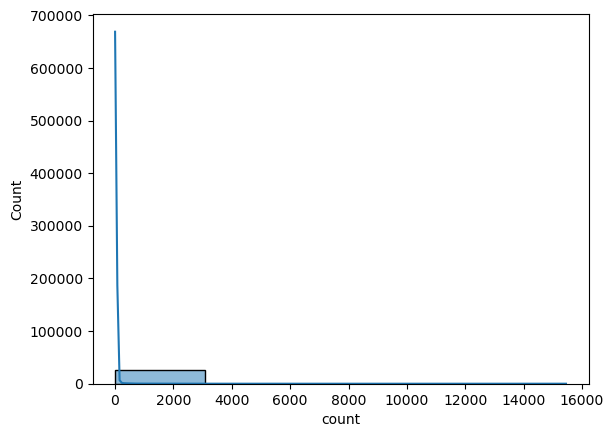

In [41]:
sns.histplot(df_combined.time_diff_seconds.value_counts(),bins= 5, kde=True)

In [48]:
df_combined[df_combined["client_id"]==4033851].visit_id

72    949661017_22392791362_127391
71    949661017_22392791362_127391
70    949661017_22392791362_127391
69    949661017_22392791362_127391
22    949661017_22392791362_127391
23    949661017_22392791362_127391
20    949661017_22392791362_127391
21    949661017_22392791362_127391
19    949661017_22392791362_127391
18    949661017_22392791362_127391
17    949661017_22392791362_127391
16    949661017_22392791362_127391
15    949661017_22392791362_127391
14    949661017_22392791362_127391
13    949661017_22392791362_127391
Name: visit_id, dtype: object

In [71]:
for client in df_combined["client_id"].head(5).unique():
    print(df_combined.client_id[client])

KeyError: 5867343